In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Transformer_CNN_BindingDB

In [37]:
affinities = pd.read_csv('./affinities/affinities_Transformer_CNN_BindingDB.csv', index_col=0)

affinities

,sm_name,SMILES,A1BG,A2M,A4GALT,AAAS,AACS,AAGAB,AAK1,AAMDC,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
0,Clotrimazole,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,5.425812,5.369073,5.672077,5.243380,5.380104,5.124884,5.393285,5.642121,...,5.531631,5.396938,5.451013,5.797935,5.323679,5.349123,5.357270,5.267841,5.052888,5.369004
1,Mometasone Furoate,C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C...,9.126519,8.976201,9.635959,9.128223,9.103909,9.296310,9.365870,9.311825,...,9.076675,9.031901,9.257396,9.724490,8.807753,8.695509,8.543714,8.838094,9.104850,8.920744
2,Idelalisib,CC[C@H](Nc1ncnc2[nH]cnc12)c1nc2cccc(F)c2c(=O)n...,6.053790,5.984482,6.319832,5.888059,6.087206,5.957499,6.115201,6.253312,...,6.044110,6.020131,6.092475,6.366847,5.910090,5.882073,5.921442,5.946301,5.705622,6.018189
3,Vandetanib,COc1cc2c(Nc3ccc(Br)cc3F)ncnc2cc1OCC1CCN(C)CC1,5.044545,5.075241,5.167343,5.025712,5.075864,5.030001,5.059283,5.194806,...,5.160057,5.097802,5.054049,5.286621,5.039180,5.049496,5.085827,5.056061,5.056771,5.103975
4,Bosutinib,COc1cc(Nc2c(C#N)cnc3cc(OCCCN4CCN(C)CC4)c(OC)cc...,6.235570,6.108244,6.758770,5.939107,6.262592,6.188431,5.999770,6.595687,...,6.196865,6.145697,6.224322,6.802927,6.116307,5.891918,6.144333,6.113499,5.846041,6.331964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,CGM-097,COc1cc2c(cc1OC(C)C)[C@H](c1ccc(Cl)cc1)N(c1ccc(...,5.853127,5.773585,6.216622,5.628127,5.848798,5.592634,5.776042,6.087515,...,5.881454,5.775818,5.987791,6.287273,5.805283,5.793484,5.722780,5.730893,5.317042,5.814378
142,TGX 221,Cc1cc(C(C)Nc2ccccc2)c2nc(N3CCOCC3)cc(=O)n2c1,6.619189,6.499111,7.136886,6.379679,6.671431,6.536956,6.589462,6.875563,...,6.525558,6.520714,6.741987,7.106418,6.466618,6.340356,6.331960,6.486197,6.222530,6.498784
143,Azacitidine,Nc1ncn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1,4.103947,3.877627,4.256020,3.947104,3.872298,3.805764,4.185144,4.200211,...,4.010046,4.099180,3.987090,4.201353,4.087244,4.015162,4.087186,4.029685,3.656611,3.996230
144,Atorvastatin,CC(C)c1c(C(=O)Nc2ccccc2)c(-c2ccccc2)c(-c2ccc(F...,7.398256,7.241309,7.772300,7.321256,7.363176,7.396194,7.609191,7.635197,...,7.417675,7.379627,7.517221,7.826987,7.092794,7.071455,7.032254,7.128745,7.055676,7.237761


C:\Users\3alen\AppData\Local\Temp\ipykernel_31524\341736855.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.axhline(y=variances_sorted[500], color='black', linestyle='--')


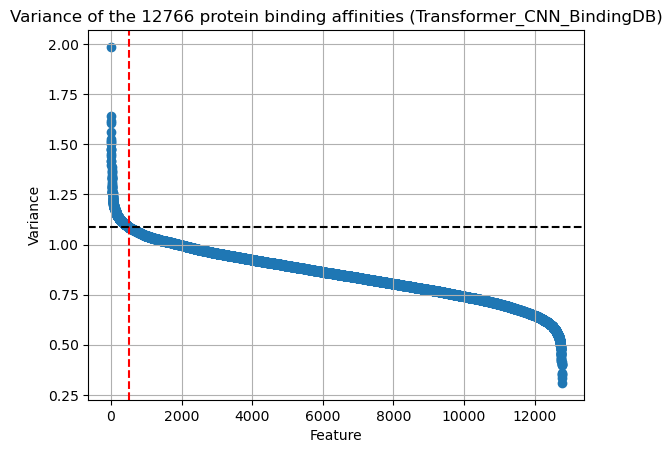

In [38]:
genes = affinities.drop(['sm_name', 'SMILES'], axis=1)

variances = genes.var()
variances_sorted = variances.sort_values(ascending=False)

plt.scatter(range(1, len(variances_sorted)+1), variances_sorted.values, marker='o')
plt.xlabel('Feature')
plt.ylabel('Variance')
plt.title('Variance of the 12766 protein binding affinities (Transformer_CNN_BindingDB)')
plt.grid(True)

# plotting vertical line to adjust cutoff region
plt.axvline(x=500, color='red', linestyle='--')

# plotting horizontal line at the cutoff variance
plt.axhline(y=variances_sorted[500], color='black', linestyle='--')

plt.show()

In [32]:
selected_variances = variances_sorted.head(500)
selected_genes = selected_variances.index.tolist()
a = affinities[['sm_name', 'SMILES']]
b = affinities[selected_genes]

concise = a.join(b)
print(concise)

                sm_name                                             SMILES  \
0          Clotrimazole             Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1   
1    Mometasone Furoate  C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C...   
2            Idelalisib  CC[C@H](Nc1ncnc2[nH]cnc12)c1nc2cccc(F)c2c(=O)n...   
3            Vandetanib      COc1cc2c(Nc3ccc(Br)cc3F)ncnc2cc1OCC1CCN(C)CC1   
4             Bosutinib  COc1cc(Nc2c(C#N)cnc3cc(OCCCN4CCN(C)CC4)c(OC)cc...   
..                  ...                                                ...   
141             CGM-097  COc1cc2c(cc1OC(C)C)[C@H](c1ccc(Cl)cc1)N(c1ccc(...   
142             TGX 221       Cc1cc(C(C)Nc2ccccc2)c2nc(N3CCOCC3)cc(=O)n2c1   
143         Azacitidine   Nc1ncn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1   
144        Atorvastatin  CC(C)c1c(C(=O)Nc2ccccc2)c(-c2ccccc2)c(-c2ccc(F...   
145           Riociguat  COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...   

        TNKS2      NUAK2     VEGFA      PLK4     NUAK1      STK

In [39]:
concise.to_csv('affinities500_Transformer_CNN_BindingDB.csv')

# MPNN_CNN_BindingDB

C:\Users\3alen\AppData\Local\Temp\ipykernel_31524\3948273250.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.axhline(y=variances_sorted[2000], color='black', linestyle='--')


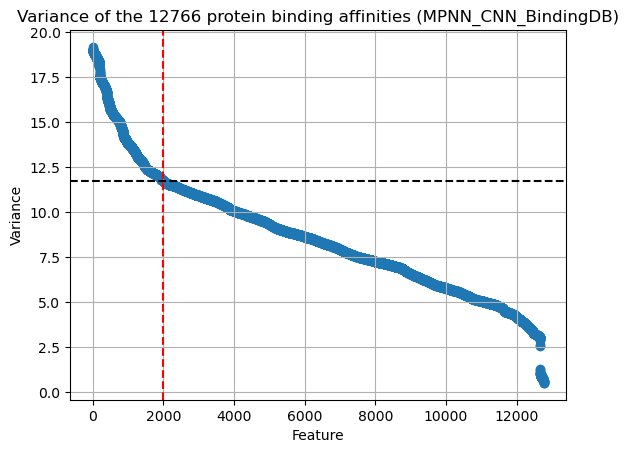

In [42]:
affinities = pd.read_csv('./affinities/affinities_MPNN_CNN_BindingDB.csv', index_col=0)
genes = affinities.drop(['sm_name', 'SMILES'], axis=1)

variances = genes.var()
variances_sorted = variances.sort_values(ascending=False)

plt.scatter(range(1, len(variances_sorted)+1), variances_sorted.values, marker='o')
plt.xlabel('Feature')
plt.ylabel('Variance')
plt.title('Variance of the 12766 protein binding affinities (MPNN_CNN_BindingDB)')
plt.grid(True)

# plotting vertical line to adjust cutoff region
plt.axvline(x=2000, color='red', linestyle='--')

# plotting horizontal line at the cutoff variance
plt.axhline(y=variances_sorted[2000], color='black', linestyle='--')

plt.show()

In [43]:
selected_variances = variances_sorted.head(2000)
selected_genes = selected_variances.index.tolist()
a = affinities[['sm_name', 'SMILES']]
b = affinities[selected_genes]

concise = a.join(b)
print(concise)

                sm_name                                             SMILES  \
0          Clotrimazole             Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1   
1    Mometasone Furoate  C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C...   
2            Idelalisib  CC[C@H](Nc1ncnc2[nH]cnc12)c1nc2cccc(F)c2c(=O)n...   
3            Vandetanib      COc1cc2c(Nc3ccc(Br)cc3F)ncnc2cc1OCC1CCN(C)CC1   
4             Bosutinib  COc1cc(Nc2c(C#N)cnc3cc(OCCCN4CCN(C)CC4)c(OC)cc...   
..                  ...                                                ...   
141             CGM-097  COc1cc2c(cc1OC(C)C)[C@H](c1ccc(Cl)cc1)N(c1ccc(...   
142             TGX 221       Cc1cc(C(C)Nc2ccccc2)c2nc(N3CCOCC3)cc(=O)n2c1   
143         Azacitidine   Nc1ncn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1   
144        Atorvastatin  CC(C)c1c(C(=O)Nc2ccccc2)c(-c2ccccc2)c(-c2ccc(F...   
145           Riociguat  COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...   

         STK10      TPST2       RORC       HIC2      CCL18  SMI

In [44]:
concise.to_csv('affinities2000_MPNN_CNN_BindingDB.csv')